<h2>Simple Demographic Filtering: Filter -> Scoring -> Sort</h2>

In [7]:
!wget https://github.com/WiraDKP/recommendation_system/raw/master/20%20-%20Recommendation%20System/data/demographic.csv

--2024-01-03 10:21:49--  https://github.com/WiraDKP/recommendation_system/raw/master/20%20-%20Recommendation%20System/data/demographic.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WiraDKP/recommendation_system/master/20%20-%20Recommendation%20System/data/demographic.csv [following]
--2024-01-03 10:21:50--  https://raw.githubusercontent.com/WiraDKP/recommendation_system/master/20%20-%20Recommendation%20System/data/demographic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4216229 (4.0M) [text/plain]
Saving to: ‘demographic.csv.1’

demographic.csv.1   100%[===================>]   4.0

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('demographic.csv')
df.head()

,title,genres,runtime,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Toy Story,Animation; Comedy; Family,81.0,7.7,5415.0,1995,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Jumanji,Adventure; Fantasy; Family,104.0,6.9,2413.0,1995,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Grumpier Old Men,Romance; Comedy,101.0,6.5,92.0,1995,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,Waiting to Exhale,Comedy; Drama; Romance,127.0,6.1,34.0,1995,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,Father of the Bride Part II,Comedy,106.0,5.7,173.0,1995,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


karena sudah ada vote average kita bisa langsung sort values dan dapatkan yang tertinggi. Meskipun cara ini terlalu gampang dengan hasil yang terlalu luas

In [10]:
df.sort_values("vote_average", ascending=False)

,title,genres,runtime,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
30718,Mortal Kombat: The Journey Begins,Action; Animation,54.0,10.0,1.0,1995,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31691,Canal Zone,Documentary,174.0,10.0,1.0,1977,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44549,Lad: A Yorkshire Story,NaN,96.0,10.0,1.0,2013,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37671,Bowery Battalion,Comedy,69.0,10.0,1.0,1951,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43186,Firefly,Comedy,84.0,10.0,1.0,1975,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32120,The Collection,NaN,64.0,0.0,0.0,1976,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21585,The Wet Parade,Drama; History; Romance,118.0,0.0,1.0,1932,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
21582,The Story of Maths,Documentary,240.0,0.0,0.0,2008,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21537,Setouchi Moonlight Serenade,Drama,117.0,0.0,0.0,1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3> Step 1 : Filter

untuk sedikit melakukan personalisasi pada rekomendasi, meskipun tidak personalize pada semua user. Personalize adalah tiap orang akan mendapat rekom yang berbeda beda.

In [11]:
genre = ["Animation", "Comedy"]
duration = (60,150)
year = (2000, 2019)
topk = 20

In [12]:
df = df[df.release_year.between(year[0], year[1]) &
df.runtime.between(duration[0], duration[1]) &
df[genre].all(axis=1)]  # method all digunakan untuk memfilter jika kedua genre adalah true, jika salah satu maka menggunakan any()

df.head()

,title,genres,runtime,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
3354,The Road to El Dorado,Adventure; Animation; Comedy; Family,89.0,7.0,892.0,2000,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3619,Chicken Run,Animation; Comedy; Family,84.0,6.5,1190.0,2000,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3622,The Adventures of Rocky & Bullwinkle,Action; Adventure; Animation; Comedy; Family,88.0,3.9,89.0,2000,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3855,Rugrats in Paris: The Movie,Adventure; Animation; Comedy; Family,78.0,6.0,101.0,2000,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3881,The Emperor's New Groove,Adventure; Animation; Comedy; Family; Fantasy,78.0,7.2,1544.0,2000,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


<h3>Step 2 : Scoring

karena sudah ada, kita bisa pakai vote_average sebagai score. Tiap company pasti beda untuk scoring

<h3> Step 3 : Sort

In [16]:
recommendation = df.loc[:, "title":"release_year"]

recommendation = df.sort_values("vote_average", ascending=False).head(topk)
recommendation

,title,genres,runtime,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
25671,Rocks in my Pockets,Comedy; Animation; Drama,88.0,9.4,5.0,2014,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
26636,Lotte from Gadgetville,Adventure; Animation; Comedy; Family,81.0,9.0,4.0,2006,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
43884,Revengeance,Comedy; Action; Animation,71.0,8.0,2.0,2017,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
28655,Cardcaptor Sakura: The Sealed Card,Comedy; Animation; Adventure; Fantasy; Romance,80.0,8.0,24.0,2000,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
30208,Inside Out,Drama; Comedy; Animation; Family,94.0,7.9,6737.0,2015,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
15433,South Park: Imaginationland,Animation; Comedy,67.0,7.9,75.0,2008,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
13710,Up,Animation; Comedy; Family; Adventure,96.0,7.8,7048.0,2009,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
14294,Mary and Max,Animation; Comedy; Drama,92.0,7.8,596.0,2009,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
20176,It's Such a Beautiful Day,Fantasy; Animation; Comedy; Drama,62.0,7.8,94.0,2012,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
24383,Big Hero 6,Adventure; Family; Animation; Action; Comedy,102.0,7.8,6289.0,2014,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


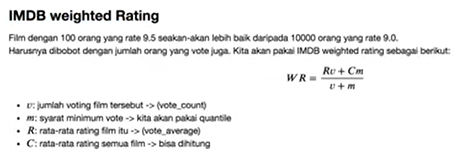

<Axes: >

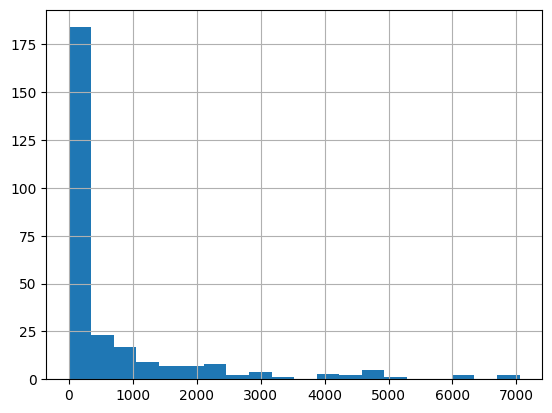

In [18]:
df.vote_count.hist(bins=20)

In [25]:
C= (df.vote_average * df.vote_count).sum() / df.vote_count.sum()
C

6.77003087052785

In [28]:
def imdb_score(df, q=0.9):
    df = df.copy()

    m = df.vote_count.quantile(q)
    C= (df.vote_average * df.vote_count).sum() / df.vote_count.sum()

    df = df[df.vote_count >= m]
    df["score"] = df.apply(lambda x: (x.vote_average * x.vote_count + C*m) / (x.vote_count + m), axis=1)
    return df



In [29]:
df = imdb_score(df)

In [30]:
recommendation = df.loc[:, "title":"release_year"]

recommendation = df.sort_values("vote_average", ascending=False).head(topk)
recommendation

,title,genres,runtime,vote_average,vote_count,release_year,Action,Adventure,Animation,Comedy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,score
30208,Inside Out,Drama; Comedy; Animation; Family,94.0,7.9,6737.0,2015,0,0,1,1,...,0,0,0,0,0,0,0,0,0,7.610738
13710,Up,Animation; Comedy; Family; Adventure,96.0,7.8,7048.0,2009,0,1,1,1,...,0,0,0,0,0,0,0,0,0,7.545092
24383,Big Hero 6,Adventure; Family; Animation; Action; Comedy,102.0,7.8,6289.0,2014,1,1,1,1,...,0,0,0,0,0,0,0,0,0,7.522613
36082,Zootopia,Animation; Adventure; Family; Comedy,108.0,7.7,4961.0,2016,0,1,1,1,...,0,0,0,0,0,0,0,0,0,7.403851
23489,How to Train Your Dragon 2,Fantasy; Action; Adventure; Animation; Comedy;...,102.0,7.6,3163.0,2014,1,1,1,1,...,0,0,0,0,0,0,0,0,0,7.248993
15328,Toy Story 3,Animation; Family; Comedy,103.0,7.6,4710.0,2010,0,0,1,1,...,0,0,0,0,0,0,0,0,0,7.326257
11556,Ratatouille,Animation; Comedy; Family; Fantasy,111.0,7.5,4510.0,2007,0,0,1,1,...,0,0,0,0,0,0,0,0,0,7.252187
4746,"Monsters, Inc.",Animation; Comedy; Family,92.0,7.5,6150.0,2001,0,0,1,1,...,0,0,0,0,0,0,0,0,0,7.300181
22656,The Lego Movie,Adventure; Animation; Comedy; Family; Fantasy,100.0,7.5,3127.0,2014,0,1,1,1,...,0,0,0,0,0,0,0,0,0,7.189244
4168,Shrek,Adventure; Animation; Comedy; Family; Fantasy,90.0,7.3,4183.0,2001,0,1,1,1,...,0,0,0,0,0,0,0,0,0,7.111034


<h3> ML Engineering: Sum them all up

In [35]:
class RecommenderSystem:
    def __init__(self, data):
        self.df = pd.read_csv(data)

    def recommend(self, genre=None, duration=None, year=None, topk=10):
        df = self.df.copy()
        df = self.demographic_filter(df, genre=genre, duration=duration, year=year)
        df = self.compute_imdb_score(df)
        result = df.loc[:, "title":"release_year"]
        result = result.sort_values("vote_average", ascending=False)
        result = result.head(topk)
        return result

    @staticmethod # karena tidak terkait dengan class, maka di static
    def demographic_filter(df, genre=None, duration=None, year=None):
        df = df.copy()

        if genre is not None:
            df = df[df[genre].all(axis=1)]
        if duration is not None:
            df = df[df.runtime.between(duration[0], duration[1])]
        if year is not None:
            df = df[df.release_year.between(year[0], year[1])]
        return df

    @staticmethod
    def compute_imdb_score(df, q=0.9):
        df = df.copy()

        m = df.vote_count.quantile(q)
        C= (df.vote_average * df.vote_count).sum() / df.vote_count.sum()

        df = df[df.vote_count >= m]
        df["score"] = df.apply(lambda x: (x.vote_average * x.vote_count + C*m) / (x.vote_count + m), axis=1)
        return df

In [36]:
recsys = RecommenderSystem(data="demographic.csv")

In [38]:
recsys.recommend(genre=["Animation", "Family"], duration=(60, 150), year=(2015, 2019))

,title,genres,runtime,vote_average,vote_count,release_year
30208,Inside Out,Drama; Comedy; Animation; Family,94.0,7.9,6737.0,2015
36082,Zootopia,Animation; Adventure; Family; Comedy,108.0,7.7,4961.0,2016
41203,Moana,Adventure; Animation; Family,107.0,7.3,3471.0,2016
37969,Finding Dory,Adventure; Animation; Comedy; Family,97.0,6.8,4333.0,2016
41433,Sing,Animation; Comedy; Drama; Family; Music,108.0,6.8,2363.0,2016
30588,Minions,Family; Animation; Adventure; Comedy,91.0,6.4,4729.0,2015
30388,The Secret Life of Pets,Animation; Family,87.0,5.9,3536.0,2016
